# Loan Repayment Prediction 
## By Yasaman Ensafi

### Predict if a borrower will pay back their loan using Logistic Regression,Random Forest, Decision tree, Neural Network

### Invastigating the impact of diffrent resampling methods on the accuracy of the model
-----

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score


%matplotlib inline

In [2]:
data_info = pd.read_csv('feature_info.csv',index_col='LoanStatNew')

In [3]:
def feature_information(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
df = pd.read_csv('lending_club.csv')

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [8]:
rcParams['figure.figsize'] = 8, 5

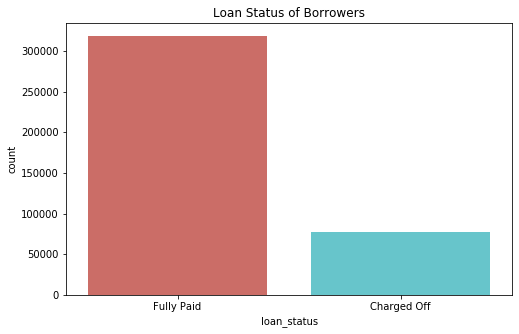

In [9]:
sns.countplot(x=df['loan_status'],palette='hls')
plt.title('Loan Status of Borrowers')
plt.show()


The above diagram shows that the dataset mainly consists of borrower who fully paid back their loan.

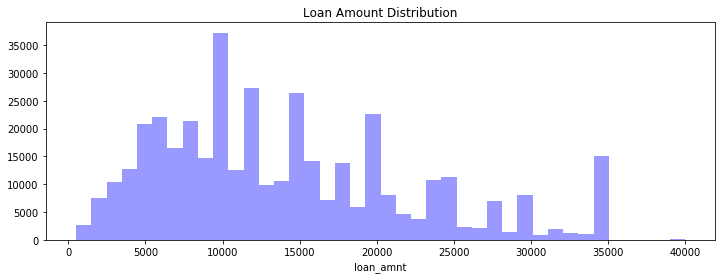

In [10]:
plt.figure(figsize=(12, 4))
sns.distplot(df['loan_amnt'],kde=False,bins=40,color='b')
plt.title('Loan Amount Distribution')
#plt.xkcd()
plt.show()

The above distribution plot represents the distribution of loan amount. 

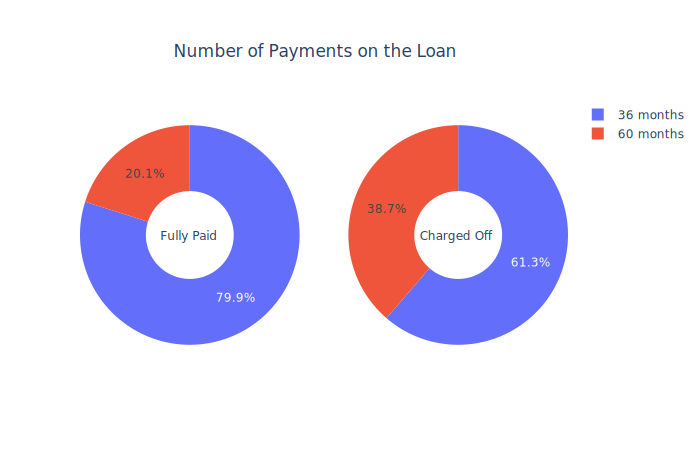

In [11]:
labels = ["36 months", "60 months"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[df[(df['loan_status']=='Fully Paid') & (df['term']==' 36 months')].shape[0],
                                            df[(df['loan_status']=='Fully Paid') & (df['term']==' 60 months')].shape[0]
                                            ], name="Fully Paid"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[df[(df['loan_status']=='Charged Off') & (df['term']==' 36 months')].shape[0],
                                            df[(df['loan_status']=='Charged Off') & (df['term']==' 60 months')].shape[0]
                                            ], name="Charged Off"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title={
        'text': "Number of Payments on the Loan",
        'y':0.9,'x':0.45,'xanchor': 'center','yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Fully Paid', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='Charged Off', x=0.85, y=0.5, font_size=12, showarrow=False)])
fig.show(renderer='svg')

The above pie charts, compare the number of payments on the loan. Most of the borrower who couldn't pay back their loan had long term loan (60 months)

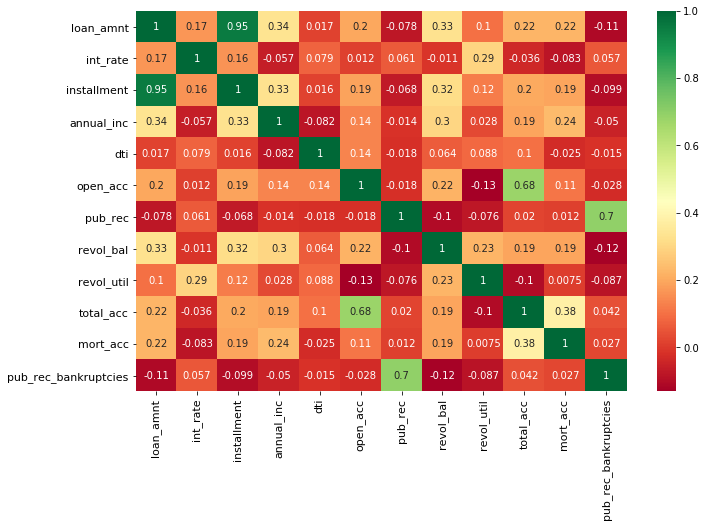

In [12]:
#Explore correlation between the continuous variables using a heatmap 

plt.figure(figsize=(11, 7))
ax =sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
bottom, top = ax.get_ylim()
#Strech out the heatmap
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [13]:
feature_information('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feature_information('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


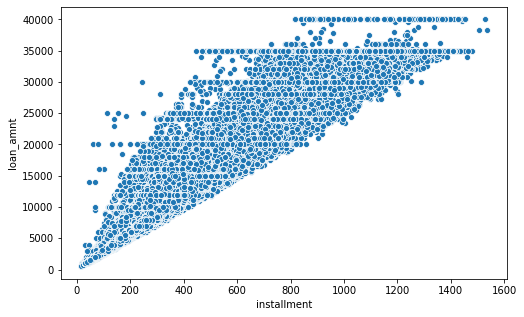

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.show()

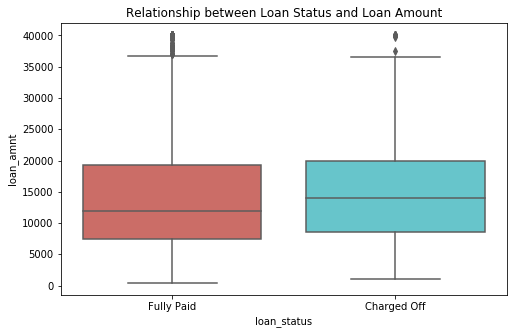

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df,palette='hls')
plt.title('Relationship between Loan Status and Loan Amount')
plt.show()

In [17]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


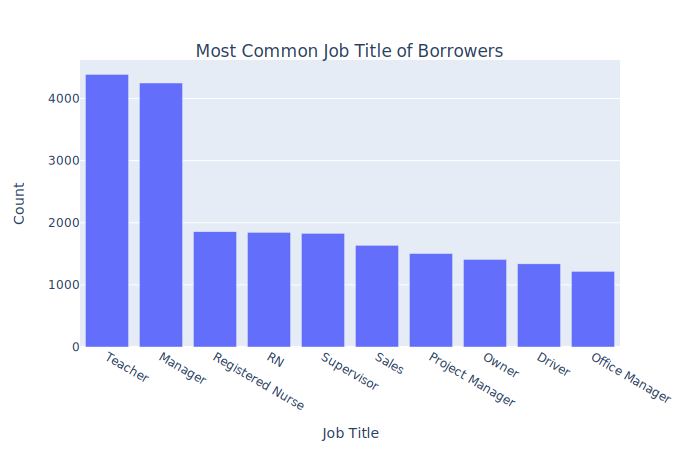

In [18]:
a = df['emp_title'].value_counts().head(10)
fig = px.bar(a, x=a.index, y=a.values, height=400)
fig.update_layout( title={
        'text': "Most Common Job Title of Borrowers",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Job Title",
    yaxis_title="Count")
fig.show(renderer='svg')

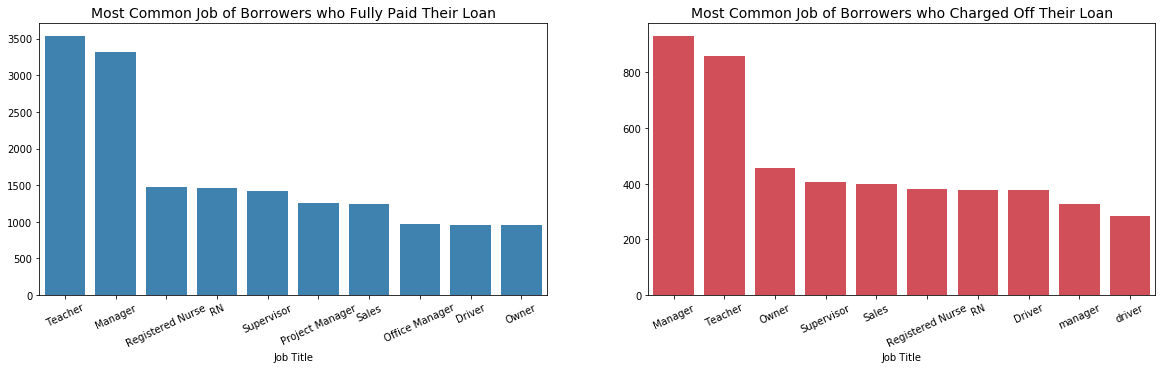

In [19]:
#Findinf the most common jobs of borrowers who fully paid their loan
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
top10_job_1 = df[df['loan_status']=='Fully Paid']['emp_title'].value_counts().head(10)
sns.barplot(x=top10_job_1.index , y=top10_job_1.values, color='#2E86C1')
plt.title('Most Common Job of Borrowers who Fully Paid Their Loan',size=14)
plt.xticks(rotation='25')
plt.xlabel('Job Title',size=10)

#Findinf the most common jobs of borrowers who charged off their loan
plt.subplot(1,2,2)
top10_job_0 = df[df['loan_status']=='Charged Off']['emp_title'].value_counts().head(10)
sns.barplot(x=top10_job_0.index , y=top10_job_0.values, color='#E63946')
plt.title('Most Common Job of Borrowers who Charged Off Their Loan',size=14)
plt.xticks(rotation='25')
plt.xlabel('Job Title',size=10)

plt.show()

In [20]:
df_top_10_jobs = df[(df['emp_title']=='Teacher') | (df['emp_title']=='Manager') 
   | (df['emp_title']=='Registered Nurse') | (df['emp_title']=='RN')
  | (df['emp_title']=='Supervisor') | (df['emp_title']=='Sales')
  |(df['emp_title']=='Project Manager') | (df['emp_title']=='Owner')
  |(df['emp_title']=='Driver') | (df['emp_title']=='Office Manager')]


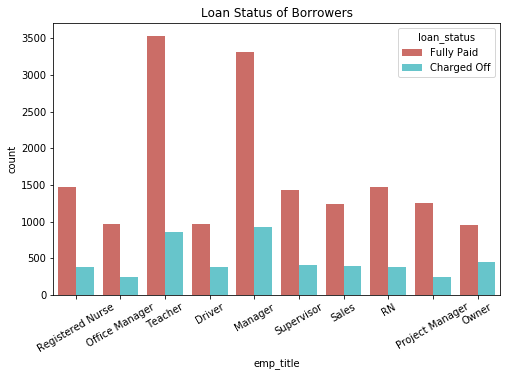

In [21]:
sns.countplot(x='emp_title',data=df_top_10_jobs, hue='loan_status',palette='hls')
plt.title('Loan Status of Borrowers')
plt.xticks(rotation='30')
plt.show()

,Borrower with Different Type of Application
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


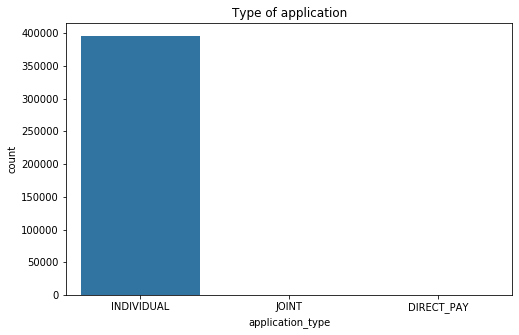

In [22]:
sns.countplot(x='application_type',data=df)
plt.title('Type of application')
application_type_data = [df[df['application_type']=='INDIVIDUAL'].shape[0],
                        df[df['application_type']=='JOINT'].shape[0],
                        df[df['application_type']=='DIRECT_PAY'].shape[0]]
pd.DataFrame(data=application_type_data, index=['INDIVIDUAL','JOINT','DIRECT_PAY'],columns=['Borrower with Different Type of Application'])

In [23]:
set(df['grade'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [24]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

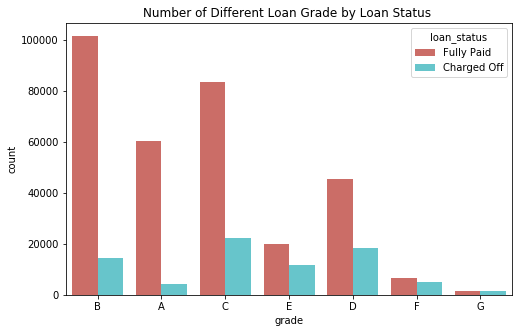

In [25]:
sns.countplot(x='grade',hue='loan_status',data=df,palette='hls')
plt.title('Number of Different Loan Grade by Loan Status ')
plt.show()

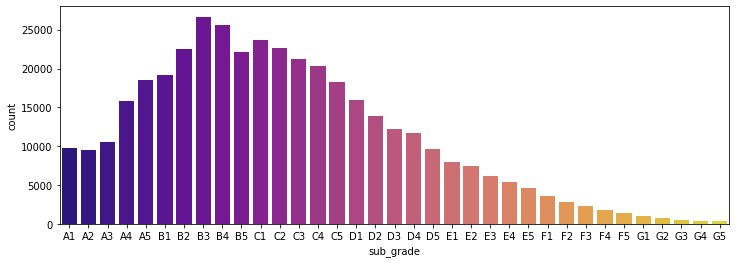

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='plasma',order=['A1',
 'A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3',
 'D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
plt.show()

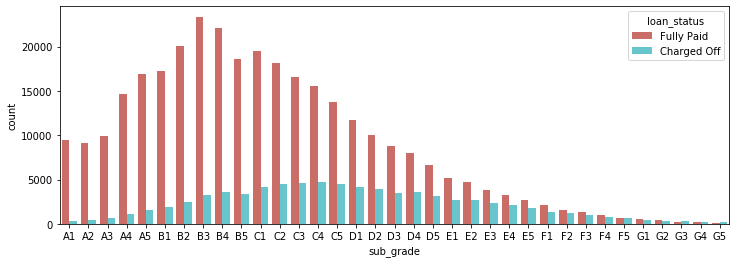

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='hls',order=sorted(df['sub_grade'].unique()), hue='loan_status')
plt.show()

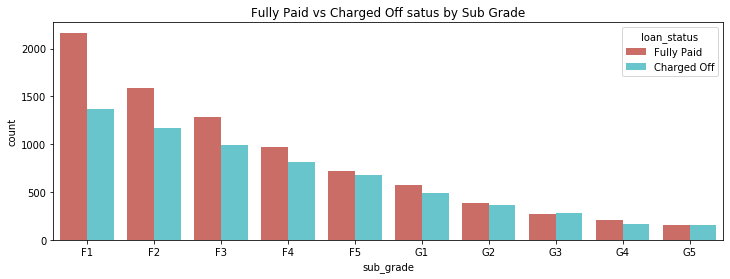

In [28]:
#Zoom in
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='hls',order=sorted(df['sub_grade'].unique())[-10:], hue='loan_status')
plt.title('Fully Paid vs Charged Off satus by Sub Grade')
plt.show()

In [29]:
# Apply one-hot encoder loan_status column

In [30]:
df['loan_repaid']= pd.get_dummies(df['loan_status'],drop_first=True)

In [31]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


# Data PreProcessing

# Missing Data

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
# Define a function to show null value percentage of each feature

In [34]:
def nullPercentage(data):
    for i in df.columns:
        percent = df[i].isnull().sum() / df.shape[0] * 100
        if percent != 0:
            print('{} : {}% null values'.format(i,np.round(percent,2)))
nullPercentage(df)

emp_title : 5.79% null values
emp_length : 4.62% null values
title : 0.44% null values
revol_util : 0.07% null values
mort_acc : 9.54% null values
pub_rec_bankruptcies : 0.14% null values


In [35]:
feature_information('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [36]:
# Unique employment job titles
df['emp_title'].unique().shape[0]

173106

In [37]:
# Too many unique job titles to convert it to dummy variables. So we remove the emp_title column.
df=df.drop('emp_title',axis=1)

In [38]:
emp_title_order= ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
 '7 years','8 years','9 years','10+ years',]

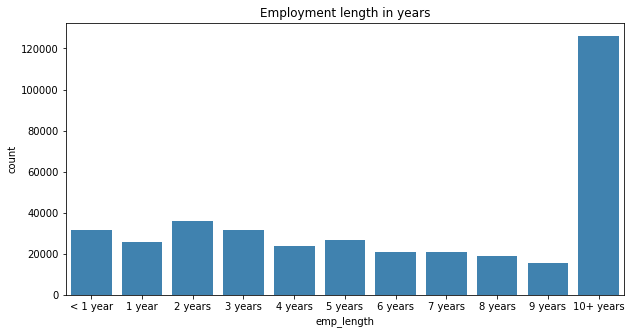

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df,order=emp_title_order,color='#2E86C1')
plt.title('Employment length in years',size=12)
plt.show()

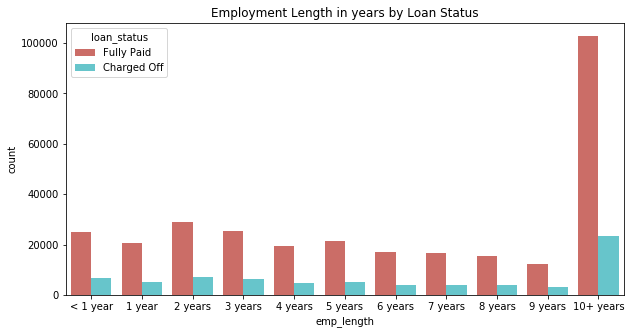

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df,order=emp_title_order,palette='hls',hue='loan_status')
plt.title('Employment Length in years by Loan Status',size=12)
plt.show()

In [41]:
# Finding percentage of charge offs per category

In [42]:
emp_length_df_1= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [43]:
emp_length_df_0= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [44]:
series = pd.Series(data=emp_length_df_0.values/(emp_length_df_1.values+emp_length_df_0.values),index=emp_length_df_0.index)

In [45]:
series

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
dtype: float64

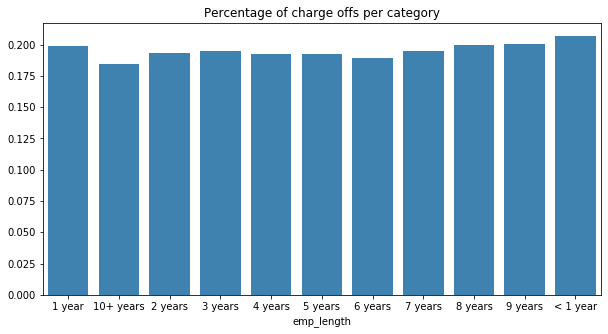

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x=series.index,y=series.values,color='#2E86C1')
plt.title('Percentage of charge offs per category',size=12)
plt.show()

In [47]:
#Similar charge off rates across all employment lengths, remove the emp_length column
df = df.drop('emp_length',axis=1)

In [48]:
nullPercentage(df)

title : 0.44% null values
revol_util : 0.07% null values
mort_acc : 9.54% null values
pub_rec_bankruptcies : 0.14% null values


In [49]:
# title column and the purpose column are similar
print(df['title'].head(3))
print(df['purpose'].head(3))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
Name: title, dtype: object
0              vacation
1    debt_consolidation
2           credit_card
Name: purpose, dtype: object


In [50]:
df = df.drop('title',axis=1)

In [51]:
nullPercentage(df)

revol_util : 0.07% null values
mort_acc : 9.54% null values
pub_rec_bankruptcies : 0.14% null values


In [52]:
feature_information('mort_acc')

Number of mortgage accounts.


9.54% of mort_acc column are missing values. We should replae them instead of removing them. 

In [53]:
# Finding features with the highest corellation with mort_acc
df.corr()['mort_acc'].index

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

In [54]:
pd.Series(data=(df.corr()['mort_acc'])).drop('mort_acc').sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

Number of mortgage accounts.
The total number of credit lines currently in the borrower's credit file
None None


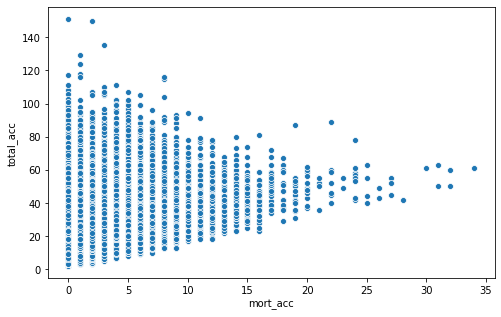

In [55]:
print(feature_information('mort_acc'),feature_information('total_acc'))
sns.scatterplot(x= 'mort_acc', y='total_acc',data=df)
plt.show()

### Create a LinearRegression model to fill missing values of mort_acc

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
#loan_amnt, annual_inc
nan_mort_total_df = df[df['mort_acc'].isnull()][['mort_acc','total_acc','loan_amnt','annual_inc']]
not_nan_mort_total_df = df[df['mort_acc'].notnull()][['mort_acc','total_acc','loan_amnt','annual_inc']]

In [58]:
X_train= np.array(not_nan_mort_total_df['total_acc']).reshape(-1, 1)
y_train= np.array(not_nan_mort_total_df['mort_acc']).reshape(-1, 1)

X_test = np.array(nan_mort_total_df['total_acc']).reshape(-1, 1)

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
predictions = lm.predict(X_test)

In [62]:
df['mort_acc2']=df['mort_acc']

In [63]:
index = df[df['mort_acc'].isnull()]['mort_acc'].index

In [64]:
predictions[0]

array([0.52306809])

In [65]:
import warnings
warnings.filterwarnings("ignore")
for i,index in enumerate(index):
    df['mort_acc2'].iloc[index]= predictions[i]

In [66]:
df = df.drop('mort_acc',axis=1)

In [67]:
nullPercentage(df)

revol_util : 0.07% null values
pub_rec_bankruptcies : 0.14% null values


In [68]:
# Drop the rest

In [69]:
df= df.dropna()

In [70]:
nullPercentage(df)

# Preprocessing Categorical Variables

In [71]:
type_series = df.dtypes

In [72]:
list(df.select_dtypes(include=['object']))

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [73]:
df['term']=df['term'].apply(lambda x: 36 if x==' 36 months' else 60)

### grade feature
grade is part of sub_grade, drop the grade feature

In [74]:
df= df.drop('grade',axis=1)

In [75]:
#Convert the subgrade into dummy variables
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df= pd.concat( [df.drop('sub_grade',axis=1),dummies],axis=1)

In [76]:
list(df.select_dtypes(include=['object']))

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [77]:
dummies3 = pd.get_dummies(df['application_type'],drop_first=True)
df= pd.concat( [df.drop('application_type',axis=1),dummies3],axis=1)

In [78]:
dummies4 = pd.get_dummies(df['initial_list_status'],drop_first=True)
df= pd.concat( [df.drop('initial_list_status',axis=1),dummies4],axis=1)

In [79]:
dummies5 = pd.get_dummies(df['purpose'],drop_first=True)
df= pd.concat( [df.drop('purpose',axis=1),dummies5],axis=1)

In [80]:
dummies7 = pd.get_dummies(df['verification_status'],drop_first=True)
df= pd.concat( [df.drop('verification_status',axis=1),dummies7],axis=1)


In [81]:
list(df.select_dtypes(include=['object']))

['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line', 'address']

### home_ownership

In [82]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [83]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [85]:
dummies7 = pd.get_dummies(df['home_ownership'],drop_first=True)
df= pd.concat( [df.drop('home_ownership',axis=1),dummies7],axis=1)

### address
Extract xip_code

In [86]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [87]:
df['zip_code']=df['address'].apply(lambda x: x[-5:])

In [88]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [89]:
dummies6 = pd.get_dummies(df['zip_code'],drop_first=True)
df= pd.concat( [df.drop('zip_code',axis=1),dummies6],axis=1)

In [90]:
df=df.drop('address',axis=1)

### issue_d 
Data leakage, drop this feature

In [91]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line
Keep the year

In [92]:
list(df.select_dtypes(include=['object']))

['loan_status', 'earliest_cr_line']

In [93]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

## Train and Test Split

In [94]:
# Drop loan_status because we replaced it with loan_repaid 
df = df.drop('loan_status',axis=1)

In [95]:
df_sample = df.sample(frac=0.5,random_state=101)
#X = df_sample.drop(['loan_repaid'],axis=1).values
#y=df_sample['loan_repaid'].values

X= df.drop(['loan_repaid'],axis=1)
y= df['loan_repaid']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

As you can see from the graph below, we are dealing with an imbalanced dataset. 
Actually 80 percent of the data points are labeled as Fully Paid. Therefore, a simple model can predict the number of fully paid loans with 80 percent accuracy. 

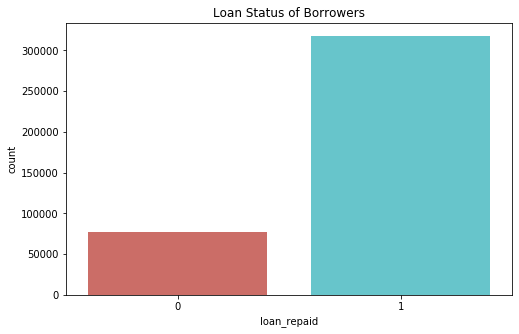

1    254310
0     61865
Name: loan_repaid, dtype: int64


In [97]:
sns.countplot(x=df['loan_repaid'],palette='hls')
plt.title('Loan Status of Borrowers')
plt.show()
print(y_train.value_counts())

By building our predictive models based on imbalanced dataset, the model performance won't be satisfactory, because the model is not trained on a sufficient amount of data representing not fully paid loans.

Therefore, we want to use a common strategy to overcome the class imbalance problem and resample the training dataset.

# Different resampling methods to deal with imbalanced dataset

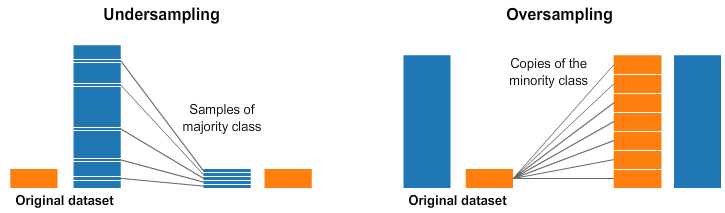

In [155]:
from IPython.display import Image
Image('resampling.png',width=300, height=500)

## Random Under Sampling
Removing samples from the majority class

In [99]:
df_train = X_train.copy()

In [100]:
df_train ['loan_repaid']=y_train

In [101]:
# Class count
count_class_1, count_class_0 = df_train['loan_repaid'].value_counts()

In [102]:
# Divide by class
df_class_0 = df_train[df_train['loan_repaid'] == 0]
df_class_1 = df_train[df_train['loan_repaid'] == 1]

Random under-sampling:
1    61865
0    61865
Name: loan_repaid, dtype: int64


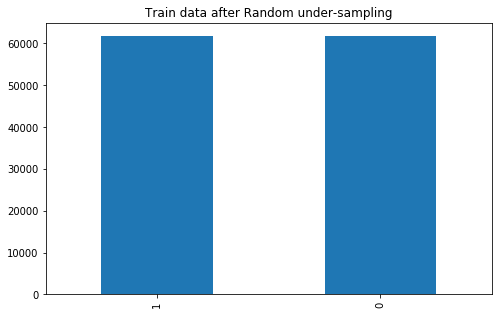

In [103]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under['loan_repaid'].value_counts())

df_test_under['loan_repaid'].value_counts().plot(kind='bar', title='Train data after Random under-sampling')
plt.show()


In [104]:
X_train_rus = df_test_under.drop('loan_repaid',axis=1)
y_train_rus = df_test_under['loan_repaid']

## Random over-sampling
Adding more examples from the minority class

Random over-sampling:
1    254310
0    254310
Name: loan_repaid, dtype: int64


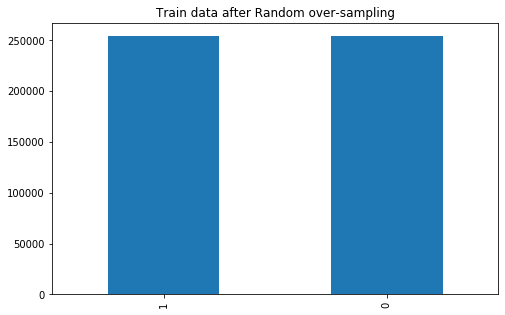

In [105]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print('Random over-sampling:')
print(y_ros.value_counts())

y_ros.value_counts().plot(kind='bar', title='Train data after Random over-sampling')
plt.show()

## Over-sampling: SMOTE (Synthetic Minority Oversampling TEchnique)
Instead of duplicating examples from the minority class, it synthesize new examples from it

In [106]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

Random over-sampling:
1    254310
0    254310
Name: loan_repaid, dtype: int64


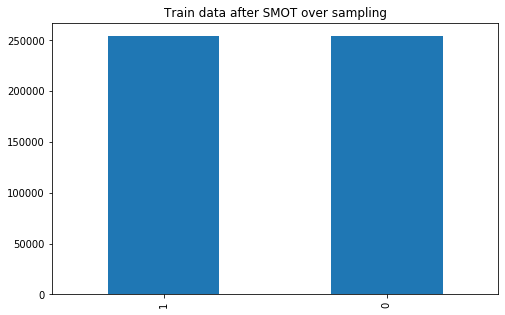

In [107]:
print('Random over-sampling:')
print(y_train_sm.value_counts())

y_train_sm.value_counts().plot(kind='bar', title='Train data after SMOT over sampling')
plt.show()

## Over-sampling followed by under-sampling (using SMOTE and Tomek links techniques)

Tomek -> Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [108]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

Over-sampling followed by under-sampling:
1    233608
0    233608
Name: loan_repaid, dtype: int64


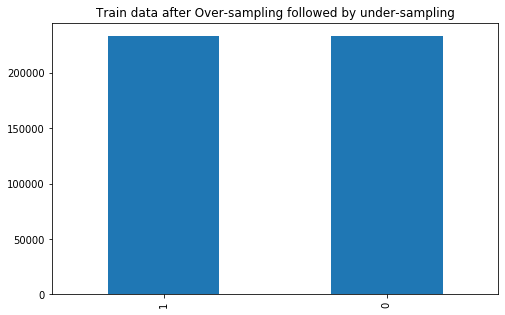

In [109]:
print('Over-sampling followed by under-sampling:')
print(y_train_smt.value_counts())

y_train_smt.value_counts().plot(kind='bar', title='Train data after Over-sampling followed by under-sampling')
plt.show()

### Define evaluation function

In [110]:
# Defining a function to store evaluation metrics
def evaluate(prediction): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['0']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [111]:
#Define a function to keep the model with highest F1-Score

def find_max(table_name):
    a= table_name.sort_values(['F1-score', 'Accuracy'], ascending=[0, 0])
    return a.iloc[0]

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
def logistic_reg(X_train,y_train):
    logModel = LogisticRegression()
    logModel.fit(X_train,y_train)
    log_predictions = logModel.predict(X_test)
    lr_result = evaluate(log_predictions)
    y_score = logModel.predict_proba(X_test)[:,1]
    return confusion_matrix(y_test,log_predictions),lr_result,y_score

In [114]:
lr_cm ,lr_result,y_score= logistic_reg(X_train,y_train)
print(lr_result)
print(lr_cm)
print('ROC AUC=%.3f' % roc_auc_score(y_test, y_score))

{'f1-score': 0.1, 'accuracy': 0.8}
[[  852 14806]
 [  758 62628]]
ROC AUC=0.688


In [115]:
lr_cm_rus ,lr_result_rus,y_score_rus = logistic_reg(X_train_rus,y_train_rus)
print(lr_result_rus)
print(lr_cm_rus)
print('ROC AUC=%.3f' % roc_auc_score(y_test, y_score_rus))

{'f1-score': 0.37, 'accuracy': 0.58}
[[ 9828  5830]
 [27116 36270]]
ROC AUC=0.642


In [116]:
lr_cm_ros ,lr_result_ros,y_score_ros = logistic_reg(X_ros,y_ros)
print(lr_result_ros)
print(lr_cm_ros)
print('ROC AUC=%.3f' % roc_auc_score(y_test, y_score_ros))

{'f1-score': 0.41, 'accuracy': 0.65}
[[ 9639  6019]
 [21797 41589]]
ROC AUC=0.687


In [117]:
lr_cm_sm ,lr_result_sm ,y_score_sm= logistic_reg(X_train_sm,y_train_sm)
print(lr_result_sm)
print(lr_cm_sm)
print('ROC AUC=%.3f' % roc_auc_score(y_test, y_score_sm))

{'f1-score': 0.37, 'accuracy': 0.59}
[[ 9452  6206]
 [26042 37344]]
ROC AUC=0.636


In [118]:
lr_cm_smt ,lr_result_smt, y_score_smt= logistic_reg(X_train_smt,y_train_smt)
print(lr_result_smt)
print(lr_cm_smt)
print('ROC AUC=%.3f' % roc_auc_score(y_test, y_score_smt))

{'f1-score': 0.41, 'accuracy': 0.66}
[[ 9420  6238]
 [21019 42367]]
ROC AUC=0.688


In [119]:
logistic_prediction_data={'Model':['Logistic Regression', 'Logistic Regression Random Under_Sample',
                                   'Logistic Regression Random Over_Sample',
                          'Logistic Regression SMOTE','Logistic Regression SMOTE & Tomek links'],
                 
                   'F1-score':[lr_result['f1-score'],lr_result_rus['f1-score'],lr_result_ros['f1-score'],
                               lr_result_sm['f1-score'],lr_result_smt['f1-score']],
                 
                   'Accuracy':[lr_result['accuracy'],lr_result_rus['accuracy'],lr_result_ros['accuracy'],
                               lr_result_sm['accuracy'],lr_result_smt['accuracy']]
                    }
 
# Create DataFrame
logistic_prediction_table = pd.DataFrame(logistic_prediction_data)
logistic_prediction_table

,Model,F1-score,Accuracy
0,Logistic Regression,0.10,0.80
1,Logistic Regression Random Under_Sample,0.37,0.58
2,Logistic Regression Random Over_Sample,0.41,0.65
3,Logistic Regression SMOTE,0.37,0.59
4,Logistic Regression SMOTE & Tomek links,0.41,0.66


In [120]:
best_logistic= find_max(logistic_prediction_table)
best_logistic

Model       Logistic Regression SMOTE & Tomek links
F1-score                                       0.41
Accuracy                                       0.66
Name: 4, dtype: object

## Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
def decision_tree(X_train,y_train):
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    dt_prediction = dtree.predict(X_test)
    dtree_result = evaluate(dt_prediction)
    return confusion_matrix(y_test,dt_prediction),dtree_result

In [123]:
dtree_cm, dtree_result = decision_tree(X_train,y_train)
print(dtree_result)
print(dtree_cm)

{'f1-score': 0.58, 'accuracy': 0.83}
[[ 9322  6336]
 [ 7172 56214]]


In [124]:
dtree_cm_rus, dtree_result_rus = decision_tree(X_train_rus,y_train_rus)
print(dtree_result_rus)
print(dtree_cm_rus)

{'f1-score': 0.53, 'accuracy': 0.74}
[[11632  4026]
 [16211 47175]]


In [125]:
dtree_cm_ros, dtree_result_ros = decision_tree(X_ros,y_ros)
print(dtree_result_ros)
print(dtree_cm_ros)

{'f1-score': 0.58, 'accuracy': 0.83}
[[ 9061  6597]
 [ 6780 56606]]


In [126]:
dtree_cm_sm, dtree_result_sm = decision_tree(X_train_sm,y_train_sm)
print(dtree_result_sm)
print(dtree_cm_sm)

{'f1-score': 0.57, 'accuracy': 0.82}
[[ 9362  6296]
 [ 7918 55468]]


In [127]:
dtree_cm_smt, dtree_result_smt = decision_tree(X_train_smt,y_train_smt)
print(dtree_result_smt)
print(dtree_cm_smt)

{'f1-score': 0.57, 'accuracy': 0.82}
[[ 9359  6299]
 [ 7641 55745]]


In [128]:
dtree_prediction_data={'Model':['Decision Tree','Decision tree Random Under_Sample',
                                'Decision Tree Random Over_Sample',
                          'Decision Tree SMOTE','Decision Tree SMOTE & Tomek links'],
                 
                   'F1-score':[dtree_result['f1-score'],dtree_result_rus['f1-score'],dtree_result_ros['f1-score'],
                               dtree_result_sm['f1-score'],dtree_result_smt['f1-score']],
                 
                   'Accuracy':[dtree_result['accuracy'],dtree_result_rus['accuracy'],dtree_result_ros['accuracy'],
                               dtree_result_sm['accuracy'],dtree_result_smt['accuracy']]
                    }
 
# Create DataFrame
dtree_prediction_table = pd.DataFrame(dtree_prediction_data)
dtree_prediction_table

,Model,F1-score,Accuracy
0,Decision Tree,0.58,0.83
1,Decision tree Random Under_Sample,0.53,0.74
2,Decision Tree Random Over_Sample,0.58,0.83
3,Decision Tree SMOTE,0.57,0.82
4,Decision Tree SMOTE & Tomek links,0.57,0.82


In [129]:
best_dtree= find_max(dtree_prediction_table)
best_dtree

Model       Decision Tree
F1-score             0.58
Accuracy             0.83
Name: 0, dtype: object

## Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
def random_forest(X_train,y_train):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    rf_prediction = rf.predict(X_test)
    rf_result = evaluate(rf_prediction)
    return confusion_matrix(y_test,rf_prediction),rf_result

In [132]:
rf_cm, rf_result = random_forest(X_train_smt,y_train_smt)
print(rf_result)
print(rf_cm)

{'f1-score': 0.61, 'accuracy': 0.88}
[[ 7574  8084]
 [ 1442 61944]]


In [133]:
rf_cm_rus, rf_result_rus = random_forest(X_train_rus,y_train_rus)
print(rf_result_rus)
print(rf_cm_rus)

{'f1-score': 0.61, 'accuracy': 0.8}
[[12137  3521]
 [12261 51125]]


In [134]:
rf_cm_ros, rf_result_ros = random_forest(X_ros,y_ros)
print(rf_result_ros)
print(rf_cm_ros)

{'f1-score': 0.64, 'accuracy': 0.89}
[[ 7887  7771]
 [ 1188 62198]]


In [135]:
rf_cm_sm, rf_result_sm = random_forest(X_train_sm,y_train_sm)
print(rf_result_sm)
print(rf_cm_sm)

{'f1-score': 0.62, 'accuracy': 0.88}
[[ 7533  8125]
 [ 1299 62087]]


In [136]:
rf_cm_smt, rf_result_smt = random_forest(X_train_smt,y_train_smt)
print(rf_result_smt)
print(rf_cm_smt)

{'f1-score': 0.61, 'accuracy': 0.88}
[[ 7581  8077]
 [ 1435 61951]]


In [137]:
rf_prediction_data={'Model':['Random Forest','Random Forest Random Under_Sample','Random Forest Random Over_Sample',
                          'Random Forest SMOTE','Random Forest SMOTE & Tomek links'],
                   'F1-score':[rf_result['f1-score'],rf_result_rus['f1-score'],rf_result_ros['f1-score'],
                               rf_result_sm['f1-score'],rf_result_smt['f1-score'],
                             ],
                 
                   'Accuracy':[rf_result['accuracy'],rf_result_rus['accuracy'],rf_result_ros['accuracy'],
                               rf_result_sm['accuracy'],rf_result_smt['accuracy']]
                    }
 
# Create DataFrame
rf_prediction_table = pd.DataFrame(rf_prediction_data)
rf_prediction_table

,Model,F1-score,Accuracy
0,Random Forest,0.61,0.88
1,Random Forest Random Under_Sample,0.61,0.80
2,Random Forest Random Over_Sample,0.64,0.89
3,Random Forest SMOTE,0.62,0.88
4,Random Forest SMOTE & Tomek links,0.61,0.88


In [138]:
best_rf= find_max(rf_prediction_table)
best_rf

Model       Random Forest Random Over_Sample
F1-score                                0.64
Accuracy                                0.89
Name: 2, dtype: object

# Neural Network

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [140]:
def neural_network(X_train,y_train,X_test,y_test):
    
    X_train = X_train.values
    y_train = y_train.values
    X_test= X_test.values
    y_test = y_test.values
    #Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Sequential()

    model.add(Dense(78,  activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(39, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(19, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=1,activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    early_stop= EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=25)

    model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )
    
    
    #Evaluate the Model
    losses = pd.DataFrame(model.history.history)
    
    
    predictions = model.predict_classes(X_test)
    
    nn_result = evaluate(predictions)
    
    
    return confusion_matrix(y_test,predictions),nn_result,losses

In [141]:
nn_cm, nn_result,losses= neural_network(X_train,y_train,X_test,y_test)

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.3014 - val_loss: 0.2658
Epoch 2/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2654 - val_loss: 0.2629
Epoch 3/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2629 - val_loss: 0.2624
Epoch 4/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2618 - val_loss: 0.2623
Epoch 5/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2611 - val_loss: 0.2619
Epoch 6/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2606 - val_loss: 0.2617
Epoch 7/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2600 - val_loss: 0.2621
Epoch 8/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2598 - val_loss: 0.2614
Epoch 9/25
316175/316175 [==============================] - 3s 11us/sample - 

{'f1-score': 0.62, 'accuracy': 0.89}
[[ 7074  8584]
 [  267 63119]]


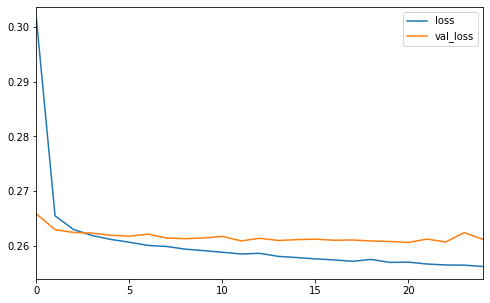

In [142]:
print(nn_result)
print(nn_cm)
losses.plot()

In [143]:
nn_cm_rus, nn_result_rus,losses_rus= neural_network(X_train_rus,y_train_rus,X_test,y_test)

Train on 123730 samples, validate on 79044 samples
Epoch 1/25
123730/123730 [==============================] - 3s 21us/sample - loss: 0.4425 - val_loss: 0.3643
Epoch 2/25
123730/123730 [==============================] - 2s 14us/sample - loss: 0.3716 - val_loss: 0.3713
Epoch 3/25
123730/123730 [==============================] - 2s 14us/sample - loss: 0.3667 - val_loss: 0.3602
Epoch 4/25
123730/123730 [==============================] - 2s 13us/sample - loss: 0.3642 - val_loss: 0.3553
Epoch 5/25
123730/123730 [==============================] - 2s 13us/sample - loss: 0.3633 - val_loss: 0.3779
Epoch 6/25
123730/123730 [==============================] - 2s 13us/sample - loss: 0.3620 - val_loss: 0.3685
Epoch 7/25
123730/123730 [==============================] - 2s 13us/sample - loss: 0.3613 - val_loss: 0.3650
Epoch 8/25
123730/123730 [==============================] - 2s 14us/sample - loss: 0.3603 - val_loss: 0.3694
Epoch 9/25
123730/123730 [==============================] - 2s 13us/sample - 

{'f1-score': 0.59, 'accuracy': 0.78}
[[12973  2685]
 [15053 48333]]


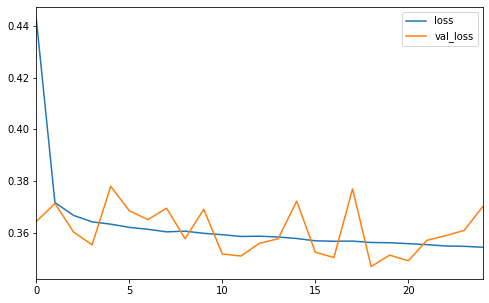

In [144]:
print(nn_result_rus)
print(nn_cm_rus)
losses_rus.plot()

In [145]:
nn_cm_ros, nn_result_ros,losses_ros= neural_network(X_ros,y_ros,X_test,y_test)

Train on 508620 samples, validate on 79044 samples
Epoch 1/25
508620/508620 [==============================] - 6s 12us/sample - loss: 0.3859 - val_loss: 0.3668
Epoch 2/25
508620/508620 [==============================] - 8s 16us/sample - loss: 0.3625 - val_loss: 0.3507
Epoch 3/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.3605 - val_loss: 0.3481
Epoch 4/25
508620/508620 [==============================] - 7s 13us/sample - loss: 0.3592 - val_loss: 0.3598
Epoch 5/25
508620/508620 [==============================] - 7s 13us/sample - loss: 0.3581 - val_loss: 0.3655TA: 0s -
Epoch 6/25
508620/508620 [==============================] - 7s 15us/sample - loss: 0.3572 - val_loss: 0.3517
Epoch 7/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.3565 - val_loss: 0.3559
Epoch 8/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.3556 - val_loss: 0.3474
Epoch 9/25
508620/508620 [==============================] - 6s 12us/s

{'f1-score': 0.6, 'accuracy': 0.78}
[[13074  2584]
 [15157 48229]]


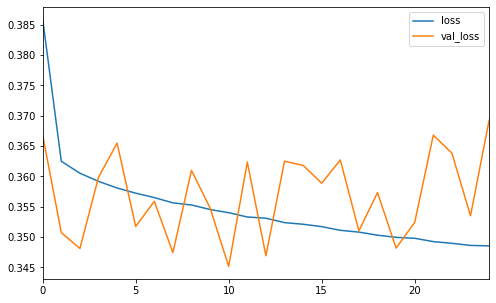

In [146]:
print(nn_result_ros)
print(nn_cm_ros)
losses_ros.plot()

In [147]:
nn_cm_sm, nn_result_sm,losses_sm= neural_network(X_train_sm,y_train_sm,X_test,y_test)

Train on 508620 samples, validate on 79044 samples
Epoch 1/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.2229 - val_loss: 0.2836
Epoch 2/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.1900 - val_loss: 0.2766
Epoch 3/25
508620/508620 [==============================] - 7s 15us/sample - loss: 0.1863 - val_loss: 0.2732
Epoch 4/25
508620/508620 [==============================] - 8s 16us/sample - loss: 0.1851 - val_loss: 0.2717
Epoch 5/25
508620/508620 [==============================] - 7s 13us/sample - loss: 0.1841 - val_loss: 0.2741
Epoch 6/25
508620/508620 [==============================] - 7s 15us/sample - loss: 0.1833 - val_loss: 0.2689
Epoch 7/25
508620/508620 [==============================] - 7s 14us/sample - loss: 0.1824 - val_loss: 0.2730
Epoch 8/25
508620/508620 [==============================] - 6s 12us/sample - loss: 0.1819 - val_loss: 0.2710
Epoch 9/25
508620/508620 [==============================] - 8s 15us/sample - 

{'f1-score': 0.6, 'accuracy': 0.89}
[[ 6831  8827]
 [  208 63178]]


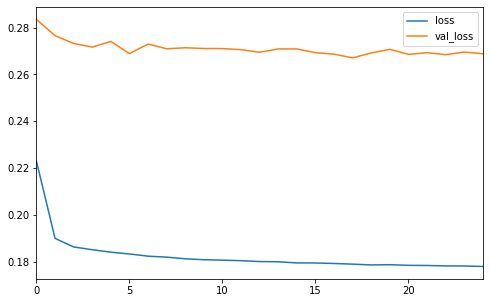

In [148]:
print(nn_result_sm)
print(nn_cm_sm)
losses_sm.plot()

In [149]:
nn_cm_smt, nn_result_smt,losses_smt= neural_network(X_train_smt,y_train_smt,X_test,y_test)

Train on 467216 samples, validate on 79044 samples
Epoch 1/25
467216/467216 [==============================] - 5s 11us/sample - loss: 0.2201 - val_loss: 0.2789
Epoch 2/25
467216/467216 [==============================] - 5s 10us/sample - loss: 0.1871 - val_loss: 0.2755
Epoch 3/25
467216/467216 [==============================] - 5s 11us/sample - loss: 0.1830 - val_loss: 0.2752
Epoch 4/25
467216/467216 [==============================] - 5s 12us/sample - loss: 0.1810 - val_loss: 0.2759
Epoch 5/25
467216/467216 [==============================] - 5s 11us/sample - loss: 0.1797 - val_loss: 0.2735
Epoch 6/25
467216/467216 [==============================] - 6s 12us/sample - loss: 0.1789 - val_loss: 0.2712
Epoch 7/25
467216/467216 [==============================] - 6s 13us/sample - loss: 0.1779 - val_loss: 0.2703
Epoch 8/25
467216/467216 [==============================] - 6s 12us/sample - loss: 0.1772 - val_loss: 0.2699
Epoch 9/25
467216/467216 [==============================] - 6s 13us/sample - 

{'f1-score': 0.6, 'accuracy': 0.89}
[[ 6822  8836]
 [  155 63231]]


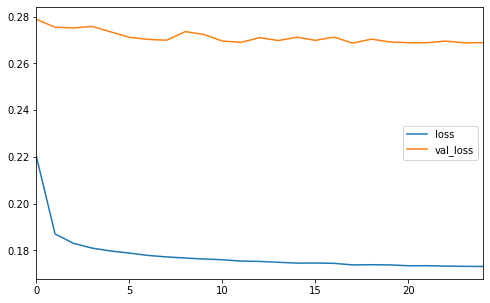

In [150]:
print(nn_result_smt)
print(nn_cm_smt)
losses_smt.plot()

In [151]:
nn_prediction_data={'Model':['NN','NN Random Under_Sample','NN Random Over_Sample',
                          'NN SMOTE','NN SMOTE & Tomek links'
                         ],
                   'F1-score':[nn_result['f1-score'],nn_result_rus['f1-score'],nn_result_ros['f1-score'],
                               nn_result_sm['f1-score'],nn_result_smt['f1-score']],
                 
                   'Accuracy':[nn_result['accuracy'],nn_result_rus['accuracy'],nn_result_ros['accuracy'],
                               nn_result_sm['accuracy'],nn_result_smt['accuracy']]
                    }
 
# Create DataFrame
nn_prediction_table = pd.DataFrame(nn_prediction_data)
nn_prediction_table

,Model,F1-score,Accuracy
0,NN,0.62,0.89
1,NN Random Under_Sample,0.59,0.78
2,NN Random Over_Sample,0.60,0.78
3,NN SMOTE,0.60,0.89
4,NN SMOTE & Tomek links,0.60,0.89


In [152]:
best_nn= find_max(nn_prediction_table)
best_nn

Model         NN
F1-score    0.62
Accuracy    0.89
Name: 0, dtype: object

## Result

In [153]:
best_data={'Model':[best_logistic['Model'],best_dtree['Model'],best_rf['Model'],best_nn['Model']],
           
                   'F1-score':[best_logistic['F1-score'],best_dtree['F1-score'],best_rf['F1-score'],
                               best_nn['F1-score']],
                 
                   'Accuracy':[best_logistic['Accuracy'],best_dtree['Accuracy'],best_rf['Accuracy'],
                               best_nn['Accuracy']]
                    }
 
# Create DataFrame
best_data_table = pd.DataFrame(best_data)
best_data_table

,Model,F1-score,Accuracy
0,Logistic Regression SMOTE & Tomek links,0.41,0.66
1,Decision Tree,0.58,0.83
2,Random Forest Random Over_Sample,0.64,0.89
3,NN,0.62,0.89


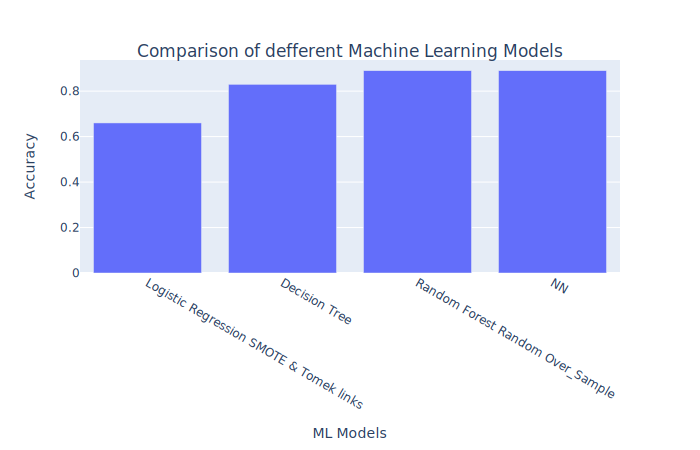

In [156]:
fig = px.bar(x=best_data_table['Model'], y=best_data_table['Accuracy'])
fig.update_layout( title={
        'text': "Comparison of defferent Machine Learning Models",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="ML Models",
    yaxis_title="Accuracy")

fig.show(renderer='svg')

# Resource:


https://www.kaggle.com/wordsforthewise/lending-club 

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/